In [5]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# **4. 데이터 전처리**

In [6]:
# Load Data
data = pd.read_csv("master.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


### **4-a. Data Restructuring (데이터 재구조화)**

#### **Table Decomposition**

In [7]:
# Delete duplicate attribute: "suicides_no", "population"
# "suicides/100k pop" * 10^5 = "suicides_no" / "population" 
data.drop("suicides_no", axis = 1, inplace = True)
data.drop("population", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.1+ MB
None


In [8]:
# Delete duplicate attribute: "country-year"
# "country" and "year" attributes also exist separately
data.drop("country-year", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_for_year ($)    27820 non-null  object 
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB
None


In [9]:
# Delete duplicate attribute: "gdp_for_year ($)"
# "gdp_for_year ($)" is proportional to "gdp_per_capita ($)"
data.drop("gdp_for_year ($)", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_per_capita ($)  27820 non-null  int64  
 7   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB
None


### **관련 설명**
#### **"suicides_no", "population" 제거**
`suicides/100k pop` 컬럼은 `suicides_no`를 *population*으로 나눈 후에 *100,000*을 곱한 값이다. 따라서 `suicides_no`와 *population*은 `suicides/100k pop`를 통해 이미 표현되고 있어서, 이 두 컬럼은 중복 정보를 제공하며, 데이터셋의 차원을 줄이기 위해 제거한다.
<br>

#### **"country-year" 제거**
`country-year`는 **country**와 **year**의 결합된 정보를 제공하는 컬럼이다. 개별 컬럼을 사용하는 것이 데이터 처리에 더 유연하며, 필요한 경우 언제든지 이 두 속성을 결합하여 동일한 정보를 재생성할 수 있다.
<br>

#### **"gdp_for_year ($)" 제거**
`gdp_for_year ($)`는 **국가의 연간 총 GDP**를 나타내고, `gdp_per_capita ($)`는 **인구 대비 GDP**를 나타낸다. 이 두 값은 서로 비례 관계에 있으므로 **국가의 총 GDP**는 *인구 수*와 *1인당 GDP*의 곱으로 계산될 수 있다. 이런 경우 `gdp_for_year ($)`는 `gdp_per_capita ($)`와 인구 데이터를 통해 추론할 수 있으므로, 중복되는 정보를 제공하고 데이터셋의 복잡성을 불필요하게 증가시킬 수 있어 제거한다.

### **4-b. Data Value Changes(데이터 값 변환)**

#### **Cleaning dirty data**

In [10]:
# Check missing values in original dataset
print("Original Dataset:")
print(data.isnull().sum())

Original Dataset:
country                   0
year                      0
sex                       0
age                       0
suicides/100k pop         0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
dtype: int64


In [11]:
# Determine what percentage is missing : 69.94%
missing_value = sum(pd.isnull(data["HDI for year"]))/len(data["HDI for year"])
print(f"Percentage of missing value of \"HDI for year\": {missing_value * 100:.2f}%\n")

# Delete missing attribute: "HDI for year"
data.drop("HDI for year", axis = 1, inplace = True)

print(data.info())

Percentage of missing value of "HDI for year": 69.94%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   gdp_per_capita ($)  27820 non-null  int64  
 6   generation          27820 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB
None


### **관련 설명**
데이터셋에서 각 컬럼별로 누락된 값의 수를 계산하여, `HDI for year`컬럼의 누락된 값의 수가 같은 컬럼 내의 전체 데이터의 70%에 달하는 걸 도출했다. -> `HDI for year` 컬럼 삭제


#### **Text preprocessing**

In [12]:
# Remove 'years' text
data["age"] = data["age"].str.strip(" years")

print(data['age'])

0        15-24
1        35-54
2        15-24
3          75+
4        25-34
         ...  
27815    35-54
27816      75+
27817     5-14
27818     5-14
27819    55-74
Name: age, Length: 27820, dtype: object


### **관련 설명**
`age` 컬럼에 **years** 텍스트를 제거한다

#### **Data discretization**

In [13]:
# Change the string of the age to an integer

# Define the function to convert age strings to integers
def convert_age(age):
    if '75+' in age:
        return 80
    elif '55-74' in age:
        return 65
    elif '35-54' in age:
        return 45
    elif '25-34' in age:
        return 30
    elif '15-24' in age:
        return 20
    elif '5-14' in age:
        return 10
    else:
        return None

# Apply the function to the 'age' column in both train and test datasets
data['age'] = data['age'].apply(convert_age)

# Verify the changes by grouping by age and calculating the mean suicide rate
age_grouped = data[['age', 'suicides/100k pop']].groupby('age', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['age'])

0        20
1        45
2        20
3        80
4        30
         ..
27815    45
27816    80
27817    10
27818    10
27819    65
Name: age, Length: 27820, dtype: int64


### **관련 설명**
데이터 타입을 **object타입**에서 **int타입**으로 바꾸고, 각 연령대의 *중간값*으로 인코딩했다. 

#### **Encoding for data mining algorighoms**

In [14]:
# Pre-processing sex property using label encoding

# Define the mapping function using map
sex_mapping = {'female': 0, 'male': 1}

data['sex'] = data['sex'].map(sex_mapping)

# Verify the changes by grouping by sex and calculating the mean suicide rate
sex_grouped = data[['sex', 'suicides/100k pop']].groupby('sex', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['sex'])

0        1
1        1
2        0
3        1
4        1
        ..
27815    0
27816    0
27817    1
27818    0
27819    0
Name: sex, Length: 27820, dtype: int64


### **관련 설명**
**라벨 인코딩**을 사용하여 **남자**는 **1**, **여자**는 **0**으로 변환하였다

In [15]:
# Pre-processing generation property using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['generation'])

# Extract the column names generated by one-hot encoding
one_hot_columns = [col for col in data_encoded.columns if 'generation_' in col]

# Add one-hot encoded columns to the original data frame
data = data.join(data_encoded[one_hot_columns])

# Drop the original 'generation' column
data.drop(columns=['generation'], inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
dtypes: bool(6), float64(1), int64(4), object(1)
memory usage: 1.4+ MB
None


### **4-c. Feature Engineering(특성 엔지니어링)**

#### **Feature Creation**

In [16]:
# Calculate the maximum value of 'suicides/100k pop'
max_value = data['suicides/100k pop'].max()

# Create a new attribute 'suicides_scaled'
data['suicides_scaled'] = data['suicides/100k pop'] / max_value * 100

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
 12  suicides_scaled             27820 non-null  float64
dtypes: bool(6), float64(2), int64(4

### **관련 설명**
데이터 분석을 용이하게 하고, 결과를 더 직관적으로 비교할 수 있게 하기 위해서 `suicides/100k pop`의 값들을 백분율로 바꾸어 새로운 속성 `suicides_scaled`에 인코딩하였다

In [17]:
# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=33)

# Prepare the new encoded column
data['country_encoded'] = 0.0

# Perform target encoding using KFold
for train_index, val_index in kf.split(data):
    train_fold, val_fold = data.iloc[train_index], data.iloc[val_index]
    mean_encoded = train_fold.groupby('country')['suicides/100k pop'].mean()
    data.loc[val_index, 'country_encoded'] = val_fold['country'].map(mean_encoded)

# Split the data into training and testing datasets
# Normally done for dividing data, but here it is used as an example to split part of the data arbitrarily
train_data = data.sample(frac=0.8, random_state=33)
test_data = data.drop(train_data.index)

# Use mean encoding for the test dataset
# Use the mean calculated from the entire dataset
global_mean = data['suicides/100k pop'].mean()
data['country_encoded'].fillna(global_mean, inplace=True)

# Drop the original 'country' column
data.drop(columns=['country'], inplace=True)

# Print the results
print("Data with Target Encoding on 'country':")
print(data['country_encoded'])


Data with Target Encoding on 'country':
0        3.494650
1        3.526042
2        3.460366
3        3.502403
4        3.494650
           ...   
27815    8.094891
27816    8.334615
27817    8.094891
27818    7.885556
27819    8.150212
Name: country_encoded, Length: 27820, dtype: float64


C:\TempFolder\ipykernel_25804\1141463371.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country_encoded'].fillna(global_mean, inplace=True)


새로운 속성 `Over_threshold_suicides` 생성: 이 속성은 `suicides/100k pop`이 **threshold**를 초과하는지 여부를 확인하여, 0과 1로 표기한다

`KFold 교차 검증`을 통한 **타깃 인코딩**: 각 국가별로 `suicides/100k pop`의 평균을 계산하고, 이를 각 검증 세트에 메핑하여 **국가별 자살률의 평균**으로 새로운 컬럼 `country_encoded`를 만든다

### **4-d. Data Reduction(데이터 축약)**

#### **Data Filtering**

In [18]:
# Split the entire dataset into training and testing data with a 70:30 ratio
train_data, test_data = train_test_split(data, test_size=0.3, random_state=33)

# Use the properties we created ('Over_threshold_suicides') as predictions
# Remove 'suicides/100k pop', a factor that affects prediction

# Ensure that all necessary columns are present and no unnecessary columns are dropped
columns_to_drop = ["suicides/100k pop", "suicides_scaled"]

# Drop columns in a single operation for both train and test sets
X_train = train_data.drop(columns=columns_to_drop)
Y_train = train_data["suicides_scaled"]

X_test = test_data.drop(columns=columns_to_drop).copy()
Y_test = test_data["suicides_scaled"]

# Print the shapes of X_train, Y_train, and X_test to verify
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (19474, 11)
Y_train shape: (19474,)
X_test shape: (8346, 11)
Y_test shape: (8346,)


#### **관련 해설**
전체 데이터 셋을 훈련 데이터와 테스트 데이터로 **7:3 비율**로 분할한다. `Over_threshold_suicides` 속성을 예측 변수로 사용하며, 예측에 영향을 줄 수 있는 `suicides/100k pop` 컬럼은 제거한다

In [19]:
print("data shape: ", data.shape, "\n")
print(data.info())

data shape:  (27820, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        27820 non-null  int64  
 1   sex                         27820 non-null  int64  
 2   age                         27820 non-null  int64  
 3   suicides/100k pop           27820 non-null  float64
 4   gdp_per_capita ($)          27820 non-null  int64  
 5   generation_Boomers          27820 non-null  bool   
 6   generation_G.I. Generation  27820 non-null  bool   
 7   generation_Generation X     27820 non-null  bool   
 8   generation_Generation Z     27820 non-null  bool   
 9   generation_Millenials       27820 non-null  bool   
 10  generation_Silent           27820 non-null  bool   
 11  suicides_scaled             27820 non-null  float64
 12  country_encoded             27820 non-null  float64
dtypes: b

### **0. [Regression] Linear Regression**
대표적인 회귀 모델로, 통계학에서 가장 기본적이고 널리 사용되는 예측 모델 중 하나이다

c:\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Training RMSE: 5.880
Test RMSE: 6.074
Training R²: 0.505
Test R²: 0.501
Average 10-Fold CV RMSE: 5.936
Average 10-Fold CV R²: 0.503


c:\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


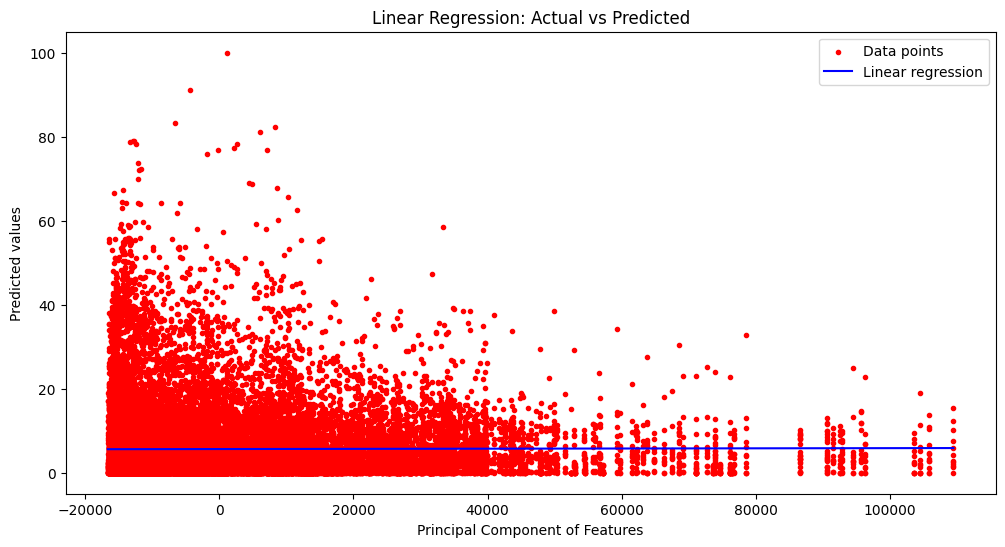

In [20]:
# 0. Linear Regression
# Create and fit the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)  # Fitting the model on the training set

# Predict on the combined dataset
y_all_pred = linear_regression.predict(np.vstack([X_train, X_test]))

# Apply PCA for visualization
pca = PCA(n_components=1)
X_all_reduced = pca.fit_transform(np.vstack([X_train, X_test]))

# Calculate RMSE and R² for training and testing sets
train_rmse = np.sqrt(mean_squared_error(Y_train, linear_regression.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(Y_test, linear_regression.predict(X_test)))
train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
test_r2 = r2_score(Y_test, linear_regression.predict(X_test))

# Print training and testing metrics
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")

# Perform 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_rmse_scores = cross_val_score(linear_regression, np.vstack([X_train, X_test]), np.concatenate([Y_train, Y_test]), cv=kf, scoring='neg_root_mean_squared_error')
cv_r2_scores = cross_val_score(linear_regression, np.vstack([X_train, X_test]), np.concatenate([Y_train, Y_test]), cv=kf, scoring='r2')

# Print cross-validation results
print(f"Average 10-Fold CV RMSE: {abs(np.mean(cv_rmse_scores)):.3f}")
print(f"Average 10-Fold CV R²: {np.mean(cv_r2_scores):.3f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_all_reduced, np.concatenate([Y_train, Y_test]), color='red', label='Data points', marker='.')
x_line = np.linspace(X_all_reduced.min(), X_all_reduced.max(), 500)  # Generating x values for the regression line
y_line_pred = linear_regression.predict(pca.inverse_transform(x_line.reshape(-1, 1)))  # Predicting y values
plt.plot(x_line, y_line_pred, color='blue', label='Linear regression')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Principal Component of Features')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

### **Linear Regression Model Evaluation**

#### 1. Training Indicators

- **평균 제곱근 오차(RMSE) 및 결정 계수(R²)**:
    - **훈련 RMSE**: *5.880* - 모델이 훈련 데이터에서 발생하는 오류의 크기를 나타낸다
    - **테스트 RMSE**: *6.074* - 미처리 테스트 데이터에서 오류가 약간 증가하여 모델이 어느 정도 일반화되고 있지만 개선의 여지가 있음을 시사한다
    - **훈련 R²**: *0.505* - 훈련 데이터 셋의 독립 변수에서 종속 변수의 분산 중 약 `50.5%`가 예측 가능함을 제시함
    - **테스트 R²**: *0.501* - 훈련 R²와 일관된 값을 보여 훈련에서 테스트로의 안정된 성능을 나타낸다

#### 2. 모델 적합성 및 일반화

- 차트는 예측된 회귀선에서 상당한 데이터 포인트의 분산을 강조하여, 선형 회귀가 포착할 수 없는 데이터의 잠재적인 과소적합 또는 비선형성을 나타낸다
- **평균 10-겹 교차 검증 RMSE**: *5.936* 및 **R²**: *0.503*은 다양한 데이터 하위 집합에서 모델의 `일관성`을 더 확인시켜주지만, 모델이 데이터의 패턴을 거의 포착하지 못한다

#### 3. 개선 가능성

- 데이터 포인트의 분포와 성능 지표를 고려할 때, 더 복잡한 모델을 탐색하거나 다항 특성을 추가하는 것이 모델이 데이터의 분산을 포착하는 능력을 개선할 수 있다

### 결론

``전반적으로, 선형 회귀 모델은 특징의 주성분에 기반하여 종속 변수를 예측하는 데 중간 정도의 효과를 보여준다. 그러나 실제 값과 예측 값 사이의 눈에 띄는 불일치와 중간 정도의 R² 값은 데이터의 복잡성을 더 잘 포착하기 위해 `Regression` 기반의 모델보다는 `Classification` 기반의 모델을 사용할 예정이다``
